# Your mission

You started working in a financial institution. You manager Mark is insterested in investing and trading **Bitcoin** to diversify his portfolio. So he turned to you to develop a crypto trading bot.

A **crypto trading bot** is a computer program with an underlying predictive model that automatically outputs a predicted day to day price for the next 30 days based on the history of Bitcoin market price and Blockchain variables. 

Your mission is to train an accurate predictive model with the lowest mean squared error. Mark is a very technical guy, he likes to understand all **technical details** and would like you to **compare the performances of classical models and neural-net based models**.

Your **target variable** is the Bitcoin Market price.

**Data source** : https://blockchain.info/

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import helper_functions as hf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats


from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from statsmodels.tsa.arima.model import ARIMA

CURDIR = os.path.dirname(os.getcwd())
DATADIR = os.path.join(CURDIR,  "data")
%matplotlib inline

# Data Exploration

In this section, you are to explore the data. You are to fulfill the following tasks:
- **Univariate analysis**
    - study the Bitcoin market price time series, in terms of its trend, cycle, seasonality, and stationnarity 
    - **Tips**: you can analyse ACF, PACF plots, perform Augmented Dickey-Fuller test
- **Multivariate analysis**
    - study other blockchain variables, retrieve insights
    - study the correlation between the Bitcoin market price and other blockchain variables 
    - **Tips**: Pearson correlation

In [5]:
df_blockchain = pd.read_csv(os.path.join(DATADIR, "df_blockchain.csv"), 
                            delimiter=",")



## Autocorrelaiton and Partial correlation

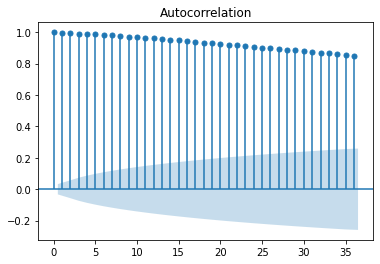

In [6]:
plot_acf(df_blockchain["market-price"]);

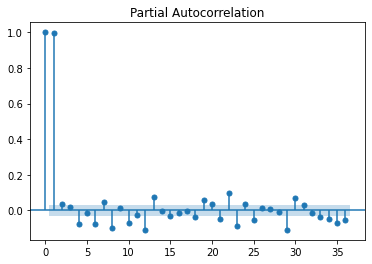

In [7]:
plot_pacf(df_blockchain["market-price"]);

(-0.5152297946328983, 0.8890100827558748, 30, 3513, {'1%': -3.4322128194388357, '5%': -2.8623630880962465, '10%': -2.567208143922995}, 53476.59821314083)


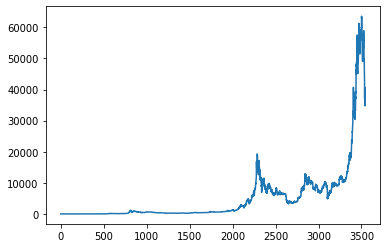

In [8]:
plt.plot(df_blockchain['market-price'])

result=adfuller(df_blockchain["market-price"])
print(result)



In [37]:
liste_colonne=df_blockchain.columns.sort_values()
liste_colonne

Index(['Date', 'avg-block-size', 'blocks-size', 'cost-per-transaction',
       'cost-per-transaction-percent', 'difficulty',
       'estimated-transaction-volume', 'estimated-transaction-volume-usd',
       'hash-rate', 'market-cap', 'market-price', 'median-confirmation-time',
       'miners-revenue', 'n-transactions', 'n-transactions-excluding-popular',
       'n-transactions-per-block', 'n-transactions-total',
       'n-unique-addresses', 'output-volume', 'total-bitcoins', 'trade-volume',
       'transaction-fees', 'transaction-fees-usd'],
      dtype='object')

In [10]:
a=df_blockchain.dropna(0)
a.shape
pearson=[]
for i in range(1,23):
    pearson.append(scipy.stats.pearsonr(a["market-price"], a[liste_colonne[i]]))

b=pd.DataFrame(pearson)
b



,0,1
0,0.585430,0.000000e+00
1,0.721858,0.000000e+00
2,0.885618,0.000000e+00
3,-0.263914,2.237296e-57
4,0.788500,0.000000e+00
5,-0.126203,5.119061e-14
6,0.904585,0.000000e+00
7,0.786110,0.000000e+00
8,0.999315,0.000000e+00
9,1.000000,0.000000e+00


## Train test split

In [11]:
X_train, X_test = hf.data_split(df_blockchain)

print(X_train.shape)
print(X_test.shape)


(3514, 23)
(30, 23)


# Modeling with ARIMA
In this section, you are to perform some classical modelings, the suggested method here is ARIMA, but you can try other models such as ARMA, ARIMAX, SARIMAX...

## Modeling
The following code allows ARIMA modeling with one combination of (p,d,q).

In [12]:
#If you need information about the function, you can display the docstring
hf.evaluate_arima_model?

In [13]:
parameters = (2,1,1)
errors, predictions = hf.evaluate_arima_model(X_train["market-price"], 
                                              X_test["market-price"], parameters )
errors

2855.3556322714658

In [40]:

a=X_test.dropna(0)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))



def ARIMAX_pred(i,j):
    mycolumns = ['estimated-transaction-volume-usd','market-cap']
    trois_indicateur_train=X_train[mycolumns]
    trois_indicateur_test=X_test[mycolumns]
    b=trois_indicateur_test.dropna(0)

 

    X_all = X_train + X_test

 

    history = X_train["market-price"].values.tolist()
    # make predictions
    predictions = list()

 

    for t in range(len(X_test)-1):
        if t==0:
            exog = X_train
        else:

 

            exog = exog.append(X_test.iloc[t])
        
        model = ARIMA(history, order=(i,1,j), exog=exog[mycolumns])
        model_fit = model.fit()
        yhat = model_fit.forecast(1, exog=b.values[t])
        predictions.append(yhat.values[0])
        history += [X_test["market-price"].values[t]]
    a=X_test.dropna(0)
    error=rmse(a['market-price'], predictions)
    return(error)


In [41]:
liste_pred=[]
for i in range(3):
    for j in range(3):
        liste_pred.append([(i,j),ARIMAX_pred(i,j)])


C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\stat

In [42]:
result=pd.DataFrame(liste_pred)
result

,0,1
0,"(0, 0)",2898.965536
1,"(0, 1)",2332.446113
2,"(0, 2)",2291.320155
3,"(1, 0)",2426.273535
4,"(1, 1)",2300.940259
5,"(1, 2)",2289.901248
6,"(2, 0)",2317.945429
7,"(2, 1)",2303.344783
8,"(2, 2)",2304.044208


In [38]:
mycolumns = ['estimated-transaction-volume-usd','market-cap']
trois_indicateur_train=X_train[mycolumns]
trois_indicateur_test=X_test[mycolumns]
b=trois_indicateur_test.dropna(0)

 

X_all = X_train + X_test

 

history = X_train["market-price"].values.tolist()
# make predictions
predictions = list()

 

for t in range(len(X_test)-1):
    if t==0:
        exog = X_train
    else:

 

        exog = exog.append(X_test.iloc[t])
        
    model = ARIMA(history, order=(1,1,2), exog=exog[mycolumns])
    model_fit = model.fit()
    yhat = model_fit.forecast(1, exog=b.values[t])
    predictions.append(yhat.values[0])
    history += [X_test["market-price"].values[t]]

C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\stat

In [39]:
a=X_test.dropna(0)
rmse(a['market-price'], predictions)

2289.9012484188224

,market-cap,market-price
0,-0.502991,-0.522435
1,-0.503018,-0.522509
2,-0.503031,-0.522539
3,-0.503045,-0.522575
4,-0.503061,-0.522618
...,...,...
3509,5.360544,5.279668
3510,4.919319,5.055670
3511,4.932625,4.993275
3512,4.894605,4.880839


0.14779745613133896

[array([5.34308738]),
 array([5.38448753]),
 array([5.30072805]),
 array([5.39173225]),
 array([5.71748565]),
 array([5.62534453]),
 array([5.73345352]),
 array([5.46204594]),
 array([5.48586964]),
 array([5.62743541]),
 array([5.60705951]),
 array([5.79606116]),
 array([5.74929053]),
 array([5.7561567]),
 array([5.50506588]),
 array([5.54025595]),
 array([4.87589256]),
 array([4.87749295]),
 array([4.77505641]),
 array([4.64003685]),
 array([4.26690711]),
 array([4.25220596]),
 array([3.72122834]),
 array([3.7421139]),
 array([3.71714197]),
 array([3.49442348]),
 array([3.28661166]),
 array([3.40649914]),
 array([3.57724973])]

In [96]:
tableau_scale_back=pd.DataFrame(X_test_scaled_pd['market-cap'])
tableau_scale_back.drop(29 , inplace=True)
tableau_scale_back.assign(market_price=predictions)

,market-cap,market_price
0,5.390986,[54056.64]
1,5.432096,[55071.459999999985]
2,5.348923,[54884.099999999984]
3,5.439290,[53584.149999999994]
4,5.762763,[57796.619999999995]
5,5.671267,[57857.5]
6,5.778619,[56610.45999999999]
7,5.509112,[57213.329999999994]
8,5.532768,[53241.719999999994]
9,5.673343,[57473.229999999996]


## Search for the best ARIMA model
We use grid search to search for the best ARIMA parameters that gives the lowest error. This follows the Box-Jenkins methology.

In [ ]:
best_cfg, best_score = hf.arima_grid_search(X_train["market-price"], 
                                            X_test["market-price"],
                                            np.arange(1,3), np.arange(3), np.arange(3))

C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed,

ARIMA(1,0,0) RMSE=2929.578


C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.A

ARIMA(1,1,0) RMSE=2893.997


C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.A

ARIMA(1,1,1) RMSE=2888.119


C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.A

ARIMA(1,1,2) RMSE=2853.040
ARIMA(1,2,0) RMSE=3400.846


C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.A

ARIMA(1,2,1) RMSE=2929.923


C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.A

ARIMA(2,0,0) RMSE=2892.336


C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.A

ARIMA(2,1,0) RMSE=2860.908


C:\Users\Pierre\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## Visualization
To have a better view on the difference between true and predict values, we visualize them by plotting both the signals.

In [26]:
predictions
a=[]
for i in range(len(predictions)):
    a.append(predictions[i][0])

IndexError: invalid index to scalar variable.

In [27]:
# prepare the dataset for plotting
predict_date = df_blockchain.iloc[-30::]["Date"]
df_predict = pd.DataFrame(zip(predict_date,
                              a, X_test["market-price"].values),
                          columns=["date", "predict", "true"])


IndexError: list index out of range

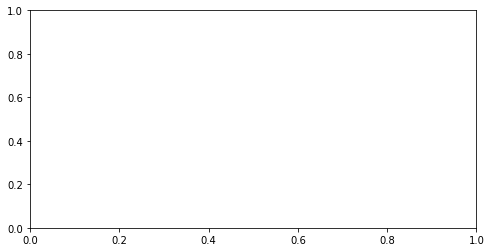

In [28]:
 fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x="date", y="true", data=df_predict, 
             ax=ax, label="y_true", markers=True )
plot_ = sns.lineplot(x="date",
             y="predict",
             data=df_predict,
             color="red",ax=ax, label="y_predict")
plot_.lines[1].set_linestyle("--")
new_ticks = plot_.get_xticklabels()
freq = 4
ax.set_xticks(np.arange(0, len(new_ticks), freq))
labels = predict_date[::freq]
ax.set_xticklabels(labels)
ax.set_ylabel("Bitcoin Market Price [USD]")
ax.set_xlabel("Test date")
ax.set_title(f"Model ARIMAX(1,1,2)")
sns.despine()
plt.legend()
plt.tight_layout()